## Assignment 1
### Name: Pasupulety Chethan Krishna Venkat
### Roll Number: 21CS30036

In [7]:
# import all the necessary libraries here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [8]:
data_df = pd.read_csv('../../dataset/linear-regression.csv')

# Split the dataset into training, validation, and test sets
train_data_df, temp_data_df = train_test_split(data_df, test_size=0.5, random_state=42)
validation_data_df, test_data_df = train_test_split(temp_data_df, test_size=0.4, random_state=42)



# Convert DataFrame to numpy arrays
train_data = train_data_df.to_numpy()
validation_data = validation_data_df.to_numpy()
test_data = test_data_df.to_numpy()

# Split data into X and y
X_train = train_data[:, :-1]                     # all rows, all the features and no labels
y_train = train_data[:, -1]                      # all rows, label only
X_validation = validation_data[:, :-1]
y_validation = validation_data[:, -1]
X_test = test_data[:, :-1]
y_test = test_data[:, -1]

# Add a column of ones to X for the intercept term
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_validation = np.hstack((np.ones((X_validation.shape[0], 1)), X_validation))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))


# Initialize theta
theta = np.zeros(X_train.shape[1])

# Calculating the theta matrix using analytical method
# theta = (X^T * X)^-1 * X^T * y
# X^T = transpose of X
# X^-1 = inverse of X
# y = output matrix
# theta = parameter matrix

# X^T * X
X_transpose_X = np.matmul(X_train.T, X_train)

# (X^T * X)^-1
X_transpose_X_inverse = np.linalg.inv(X_transpose_X)

# X^T * y
X_transpose_y = np.matmul(X_train.T, y_train)

# (X^T * X)^-1 * X^T * y
theta = np.matmul(X_transpose_X_inverse, X_transpose_y)


# Predicting the output using the calculated theta matrix
y_pred = np.matmul(X_test, theta)

# Calculating the mean squared error
mse = np.mean((y_pred - y_test) ** 2)

# Calculating the root mean squared error
rmse = np.sqrt(mse)

# Calculating the R2 score
r2_score = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

# Printing the results for the analytical method
print('Analytical Method')
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('R2 Score: ', r2_score)




Analytical Method
Mean Squared Error:  0.4431719294923638
Root Mean Squared Error:  0.6657115963330996
R2 Score:  0.3967805083008594


# Gradient Descent Method

In [13]:
data_df = pd.read_csv('../../dataset/linear-regression.csv')

# Split the dataset into training, validation, and test sets
train_data_df,temp_data_df = train_test_split(data_df, test_size=0.5, random_state=42)
validation_data_df, test_data_df = train_test_split(temp_data_df, test_size=0.4, random_state=42)

# Convert DataFrame to numpy arrays
train_data = train_data_df.to_numpy()
validation_data = validation_data_df.to_numpy()
test_data = test_data_df.to_numpy()

# Split data into X and y
X_train = train_data[:, :-1]
y_train = train_data[:, -1]
X_validation = validation_data[:, :-1]
y_validation = validation_data[:, -1]
X_test = test_data[:, :-1]
y_test = test_data[:, -1]

# normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Add a column of ones to X_train, X_validation, and X_test
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_validation = np.hstack((np.ones((X_validation.shape[0], 1)), X_validation))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))



# Initialize thetas for 3 models
theta1 = np.zeros(X_train.shape[1])
theta2= np.zeros(X_train.shape[1])
theta3=np.zeros(X_train.shape[1])


# predictor function after finding theta
def y_predictor(X_test, theta):
    return np.matmul(X_test, theta)

# mean squared error function
def mean_squared_error(y_test, y_pred):
    return np.sum((y_pred - y_test)**2)/y_test.size

# root mean squared error function
def root_mean_squared_error(y_test, y_pred):
    return np.sqrt(np.mean((y_pred - y_test)**2))

# r2 score function
def r2_score_error(y_test, y_pred):
    return 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

# gradient descent function
def gradient_descent(X_train, y_train, theta, alpha, iterations, iteration, validation_mse,training_mse):
    for i in range(iterations):
        
        # calculating the gradient term as an (n+1 X 1) matrix 
        # gradient matrix= (X^T)*(X*theta-Y)

        # loss matrix=(X*theta-Y)
        loss=np.dot( X_train, theta) - y_train

        # X^T*loss
        gradient=np.dot(X_train.T,loss)/y_train.size

        # Directly repeating theta=theta-(alpha)gradient until convergence
        theta = theta - alpha * gradient

        # storing values of mse vs iteration for plotting the graph
        iteration.append(i+1)
        training_mse.append(mean_squared_error(y_train, np.dot(X_train, theta)))
        validation_mse.append(mean_squared_error(y_validation, np.dot(X_validation,theta)))

    return theta


## First Model

theta matrix:  [ 5.6430605   0.03556461 -0.215944   -0.04556511  0.03454144 -0.08419887
  0.03180185 -0.10097283 -0.04565794 -0.0080804   0.12436804  0.29577867]
Mean Squared Error1:  0.4414484382303795
Root Mean Squared Error1:  0.6644158624162878
R2 Score1:  0.27795802924608537


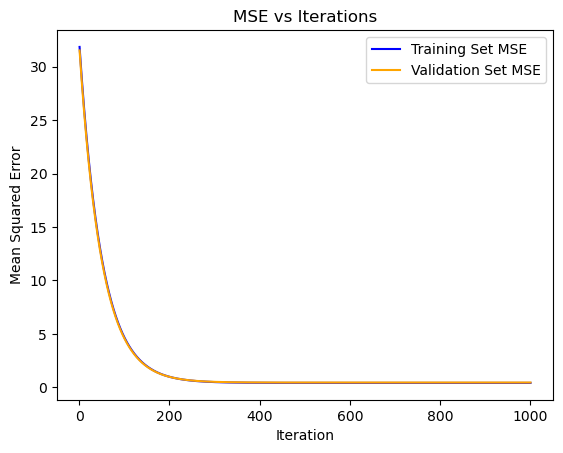

In [14]:

# Set hyperparameters
alpha = 0.01
iterations = 1000

# Initializing lists to store the mse and iteration values for the plot
validation_mse1 = []
training_mse1=[]
iteration1 = []


# Perform gradient descent to learn theta
theta1 = gradient_descent(X_train, y_train, theta1, alpha,
                         iterations, iteration1,validation_mse1,training_mse1)

# Predicting the output using the calculated theta matrix and evaluating errors for validation set data
y_pred = y_predictor(X_validation, theta1)

# Calculating the mean squared error
mse = mean_squared_error(y_validation, y_pred)


# Calculating the root mean squared error
rmse = root_mean_squared_error(y_validation, y_pred)

# Calculating the R2 score
r2_score = r2_score_error(y_validation, y_pred)

# Printing theta, rmse, and r2_score
print('theta matrix: ',theta1)
print('Mean Squared Error1: ', mse)
print('Root Mean Squared Error1: ', rmse)
print('R2 Score1: ', r2_score)


# Plotting the predicted values against the actual values
plt.plot(iteration1, training_mse1, label='Training Set MSE', color='blue')
plt.plot(iteration1, validation_mse1, label='Validation Set MSE', color='orange')


plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Iterations')
plt.legend()
plt.show()





#### We can see that this model with hyperparameters (alpha=0.01,iterations=1000) is working fine as the r2_score is between [0,1] and the mse value is also close to zero

#### It can be seen that there isnt much overfitting too as the plots for both the training and the validation data set are almost coinciding.



## Second model

theta matrix:  [ 3.56828702e+00  2.58132362e-02 -1.49289870e-01  4.27779059e-02
  2.12870069e-02 -6.29974361e-02 -3.03403624e-03 -7.16809247e-02
 -7.65596010e-02  1.24433361e-02  8.53388269e-02  2.07996712e-01]
Mean Squared Error2:  4.632374444268015
Root Mean Squared Error2:  2.1522951573304288
R2 Score2:  -6.576805088307521


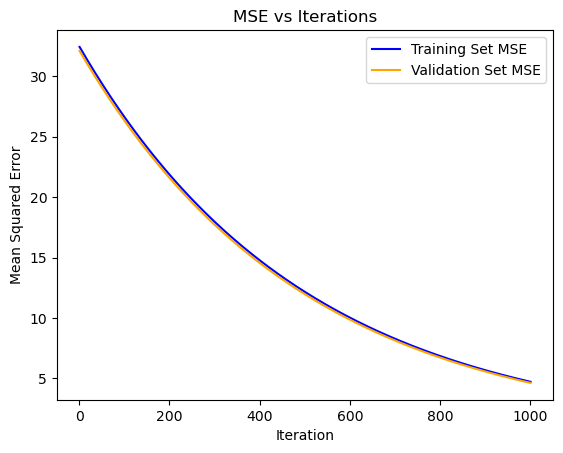

In [15]:


# Set hyperparameters2
alpha = 0.001
iterations = 1000


# Initializing lists to store the mse and iteration values for the plot
validation_mse2 = []
training_mse2=[]
iteration2 = []



# Perform gradient descent to learn theta
theta2 = gradient_descent(X_train, y_train, theta2, alpha,
                         iterations, iteration2, validation_mse2,training_mse2)

# Predicting the output using the calculated theta matrix on validation set
y_pred = y_predictor(X_validation, theta2)

# Calculating the mean squared error
mse = mean_squared_error(y_validation, y_pred)


# Calculating the root mean squared error
rmse = root_mean_squared_error(y_validation, y_pred)

# Calculating the R2 score
r2_score = r2_score_error(y_validation, y_pred)

# Print theta, rmse, and r2_score

print('theta matrix: ',theta2)
print('Mean Squared Error2: ', mse)
print('Root Mean Squared Error2: ', rmse)
print('R2 Score2: ', r2_score)



# Plotting the predicted values against the actual values
plt.plot(iteration2, training_mse2, label='Training Set MSE', color='blue')
plt.plot(iteration2, validation_mse2, label='Validation Set MSE', color='orange')


plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Iterations')
plt.legend()
plt.show()

#### we can see that for the hyperparameters (alpha=0.001,iterations=1000) the iterations are not sufficient for convergence as the r2_score is becoming negative.The mse error is also larger when compared to the the previous case.


## Third Model

theta matrix:  [ 3.56735237e+00  2.58088217e-02 -1.49249180e-01  4.27603488e-02
  2.12819174e-02 -6.29796589e-02 -3.03138181e-03 -7.16627296e-02
 -7.65332887e-02  1.24369437e-02  8.53172070e-02  2.07938771e-01]
Mean Squared Error2:  4.636207974499204
Root Mean Squared Error2:  2.153185541122549
R2 Score2:  -6.583075287686112


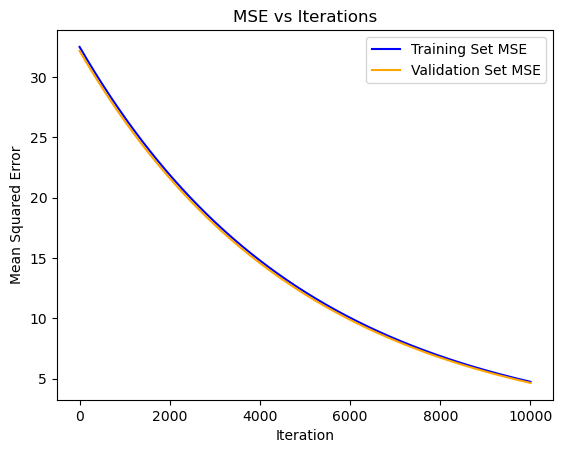

In [16]:


# Set hyperparameters3
alpha = 0.0001
iterations = 10000

# Initialize theta
theta3 = np.zeros(X_train.shape[1])

# Initializing lists to store the mse and iteration values for the plot
validation_mse3 = []
training_mse3=[]
iteration3 = []



# Perform gradient descent to learn theta
theta3 = gradient_descent(X_train, y_train, theta3, alpha,iterations, iteration3, validation_mse3,training_mse3)

# Predicting the output using the calculated theta matrix for the validation set
y_pred = y_predictor(X_validation, theta3)

# Calculating the mean squared error
mse = mean_squared_error(y_validation, y_pred)

# Calculating the root mean squared error
rmse = root_mean_squared_error(y_validation, y_pred)

# Calculating the R2 score
r2_score = r2_score_error(y_validation, y_pred)

# Print theta, rmse, and r2_score
print('theta matrix: ',theta3)
print('Mean Squared Error2: ', mse)
print('Root Mean Squared Error2: ', rmse)
print('R2 Score2: ', r2_score)



# Plotting the predicted values against the actual values
plt.plot(iteration3, training_mse3, label='Training Set MSE', color='blue')
plt.plot(iteration3, validation_mse3, label='Validation Set MSE', color='orange')


plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Iterations')
plt.legend()
plt.show()

##### The same result as we have seen before.we can see that for the hyperparameters (alpha=0.0001,iterations=10000), the no of iterations are not sufficient for convergence as the r2_score is becoming negative.The mse error is also larger when compared to the original model.

#### Hence we can proceed with the first model for calculating the  final errors on the testing data set.

In [17]:
# using the first model to predict the values of the testing data set
y_pred = y_predictor(X_test, theta1)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)


# Calculating the root mean squared error
rmse = root_mean_squared_error(y_test, y_pred)

# Calculating the R2 score
r2_score = r2_score_error(y_test, y_pred)

# Printi, rmse, and r2_score
print('Gradient Descent Model:')
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('R2 Score: ', r2_score)

Gradient Descent Model:
Mean Squared Error:  0.4436561528393705
Root Mean Squared Error:  0.6660751855754502
R2 Score:  0.3961214120408936
